In [1]:
!pip install -q kaggle

Der Befehl "pip" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [ ]:
!kaggle datasets download -d amananandrai/ag-news-classification-dataset
!unzip ag-news-classification-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset
License(s): unknown
  0% 0.00/11.4M [00:00<?, ?B/s]
100% 11.4M/11.4M [00:00<00:00, 877MB/s]
Archive:  ag-news-classification-dataset.zip
  inflating: test.csv                
  inflating: train.csv               


####CSV einlesen Pandas

In [ ]:
import pandas as pd

df = pd.read_csv("train.csv", header=None)
df.columns = ["label", "title", "description"]
df.head()

,label,title,description
0,Class Index,Title,Description
1,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
2,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
3,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
4,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...


#Preprocessing

###Packages

In [ ]:
!pip install -q nltk scikit-learn

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# NLTK-Ressourcen laden (einmalig nötig)
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


###Preprocessing BoW/TF-IDF

In [ ]:
def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove punctuation (nur einfache Variante)
    text = re.sub(r'[^\w\s]', '', text)

    # 3. Tokenization
    tokens = text.split()

    # 4. Stopword removal
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Re-join for vectorizer
    return ' '.join(tokens)

In [ ]:
# Beispieldaten laden
df = pd.read_csv("train.csv", header=None)
df.columns = ['label', 'title', 'description']

# Für dieses Beispiel: nur Titel + Beschreibung kombinieren
df['text'] = df['title'] + " " + df['description']

# Preprocessing anwenden
df['clean_text'] = df['text'].apply(preprocess_text)

In [ ]:
# BoW und TF-IDF erzeugen

# Bag-of-Words
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['clean_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# Labels als Zahlen (1–4)
y = df['label']

#Classification for BoW and TF-IDF

##k-Nearest Neighbors

In [ ]:
# Daten aufteilen
from sklearn.model_selection import train_test_split

In [ ]:
# Train/ Test- Split (BoW)
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

In [ ]:
# training kNN-Modell
from sklearn.neighbors import KNeighborsClassifier

# Modell initialisieren
knn = KNeighborsClassifier(n_neighbors=5)

# Training
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Forecast and Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Vorhersage
y_pred = knn.predict(X_test)

# Metriken berechnen
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6766
F1-score: 0.6860
              precision    recall  f1-score   support

           1       0.94      0.63      0.75      6047
           2       0.47      0.97      0.63      5872
           3       0.88      0.56      0.68      6079
           4       0.85      0.56      0.68      6002
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.68     24001
   macro avg       0.63      0.54      0.55     24001
weighted avg       0.79      0.68      0.69     24001



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


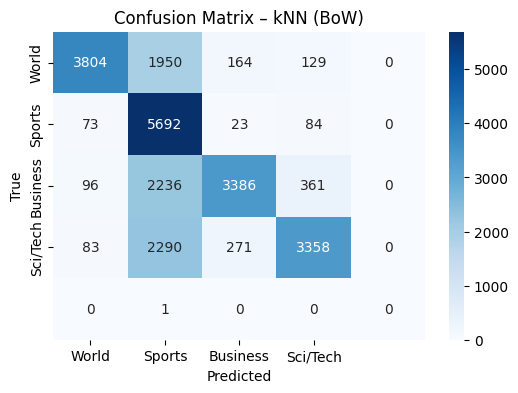

In [ ]:
# Visualizing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'],
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix – kNN (BoW)')
plt.show()

Accuracy: 0.9016
F1-score: 0.9013
              precision    recall  f1-score   support

           1       0.90      0.90      0.90      6047
           2       0.94      0.97      0.96      5872
           3       0.87      0.88      0.87      6079
           4       0.90      0.86      0.88      6002
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.90     24001
   macro avg       0.72      0.72      0.72     24001
weighted avg       0.90      0.90      0.90     24001



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


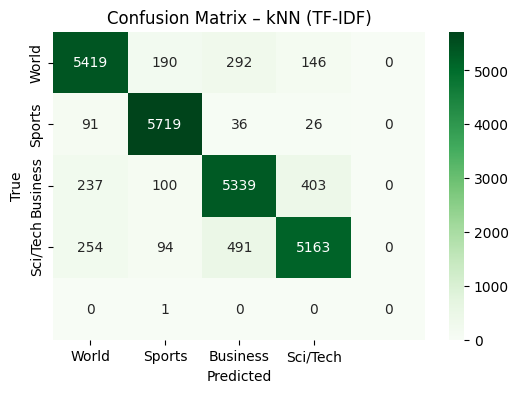

In [ ]:
# Train/ Test- Split (TF-IDF)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# kNN-Klassifikator auf TF-IDF trainieren
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Forecast and Evaluation
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matric for TF-IDF
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'],
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix – kNN (TF-IDF)')
plt.show()

##Multilayer Perceptron (MLP)

In [ ]:
# Train/Test- Split
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

# BoW
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# TF-IDF
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# BoW
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# TF-IDF
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# MLP Modell trainieren

from sklearn.neural_network import MLPClassifier

# Einfaches MLP-Modell
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Training mit BoW
mlp.fit(X_train_bow, y_train_bow)

# Evaluation Bow

y_pred_bow = mlp.predict(X_test_bow)

acc_bow = accuracy_score(y_test_bow, y_pred_bow)
f1_bow = f1_score(y_test_bow, y_pred_bow, average='weighted')

print("MLP with BoW")
print(f"Accuracy: {acc_bow:.4f}")
print(f"F1-score: {f1_bow:.4f}")
print(classification_report(y_test_bow, y_pred_bow))

# MLP auf TF-IDF
mlp_tfidf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42)
mlp_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Evaluation mit TF-IDF
y_pred_tfidf = mlp_tfidf.predict(X_test_tfidf)

acc_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf, average='weighted')

print("MLP with TF-IDF")
print(f"Accuracy: {acc_tfidf:.4f}")
print(f"F1-score: {f1_tfidf:.4f}")
print(classification_report(y_test_tfidf, y_pred_tfidf))

#  Confusion Matrix – MLP + BoW
cm_bow = confusion_matrix(y_test_bow, y_pred_bow)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues',
            xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'],
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix – MLP (BoW)')
plt.show()

In [ ]:

# Confusion Matrix – MLP + TF-IDF
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'],
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix – MLP (TF-IDF)')
plt.show()